# Aiming for a correlation coefficient of zero

## Using a squaring function

We are going to hardwire a relationship between two lists of numbers, by squaring the first list. The below code is set up to start with a list of random numbers. Then to make another list by squaring the first.

The slider shifts the graph around. It starts with an offset of 15, which gets us a nice parabola. If you change the offset, then you will see a different part of the parabola -- a part that looks a bit straighter. So the `correlation coefficient` shifts towards plus or minus one.

In [1]:
from random import uniform
import pandas as pd
from ipywidgets import interact, IntSlider

def square(n):
    return n*n

@interact(
    offset = IntSlider(min=1, max=30, value=15, step=2, continuous_update=False)
)
def make_data(offset):
    def random_nums(n):
        out = []
        while n > 0:
            n -= 1
            out.append(uniform(10, 20) - offset)
        return out

    list_a = pd.Series(random_nums(200))
    list_b = pd.Series(map(square, list_a))

    data = pd.DataFrame({
        "random_nums_a": list_a,
        "square_of_list_a": list_b,
    })

    data.plot.scatter(x = "random_nums_a", y = "square_of_list_a", title="random numbers vs their square")
    print("This data set has correlation coefficient: ", list_a.corr(list_b))


interactive(children=(IntSlider(value=15, continuous_update=False, description='offset', max=30, min=1, step=2…

## Getting the elusive zero

This data starts with [-100, -99, ..., 99, 100]

And the corresponding squares. 

The correlation coefficient is zero

0     -100
1      -99
2      -98
3      -97
4      -96
      ... 
196     96
197     97
198     98
199     99
200    100
Length: 201, dtype: int64
This data set has correlation coefficient:  0.0


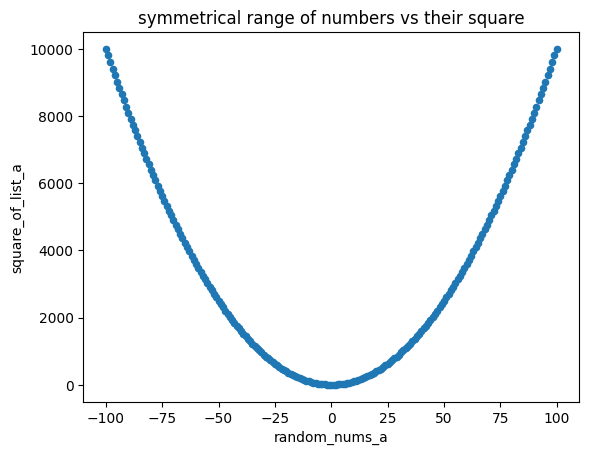

In [10]:
list_a = pd.Series(range(-100, 101))
print(list_a)
list_b = pd.Series(map(square, list_a))

data = pd.DataFrame({
    "random_nums_a": list_a,
    "square_of_list_a": list_b,
})

data.plot.scatter(x="random_nums_a", y="square_of_list_a",
                  title="symmetrical range of numbers vs their square")
print("This data set has correlation coefficient: ", list_a.corr(list_b))
